# Substitution Ciphers

Brief introduction to substitution ciphers (Max 150 words)

Each character is replaced with a different siphertext symbol (encoding) and to decipher the text is the reverse subsitition made (decoding).

In [39]:
import matplotlib.pyplot as plt

from string import ascii_lowercase as alc


## Caesar Cipher

Explanation of Caesar Cipher (Max 150 words)

Caesar Cipher used the substiution method, by shifting the letters in the alphabeth by a fixed number of spaces to make an encoding alphabet.

Type of attacks of Caesar Cipher (Max 150 words)

Brute Force: try all possibilites
Frequency analysis: interpret the shift by comparing the freqency of letters to the one of the alphabet

### Decoder

Explain how the decoder of a Caesar Cipher works (Max 150 words)

The decoder will take in the ciphertext, and needs the alphabet and the shift in order to correctly make a new alphabet.

In [40]:
#hardcoded, assuming the english alphabet 
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def caesar_decoding(ciphertext, shift=0):
    
    #recreating the cipher_alphabet used, by using the negative shift and the english alphabet
    cipher_alphabet = alphabet[-shift:] + alphabet[:-shift]

    #making a mapping dictionary, matching the alphabet to their encoded counterpart in a tuple
    mapping = dict(zip(alphabet, cipher_alphabet))
    #checking each letter in the ciphertext and matching it to the corresponding letter from the dictionary

    plaintext = ''

    for x in ciphertext:
        if x in mapping.keys():
            plaintext+=mapping.get(x)
        else:
            plaintext+=x

    return plaintext

In [41]:
# code snippet to test the implementation of the decoder
ciphertext = 'lipps!' # 'hello!' encoded with shift=4
plaintext = caesar_decoding(ciphertext, shift=4)

print(ciphertext, '->', plaintext)

lipps! -> hello!


### Ciphertext

In [42]:
# Load ciphertext
with open(file='ciphertext_caesar.txt', mode='r') as f:
    txt = f.read()

### Brute Force

Describe the procedure necessary to perfrom a Brute Force attack  (Max 150 words)

Brute Force is trying every possiblity, one by one, to try crack the code. 

For this, it would mean trying 26 possible shifts to find the right one. 

In [43]:
# Perform a Brute Force attack

#trying all shifts possible in the alphabet, which is the length of the alphabet
#printing the shift and plaintext translated to find the right one
for shift in range(len(alphabet)):
    plaintext = caesar_decoding(txt, shift=shift)
    print(shift, '->', plaintext[:50])

0 -> qfmdhcufodvm, cf qfmdhczcum (tfca obqwsbh ufssy: κ
1 -> pelcgbtencul, be pelcgbybtl (sebz napvrag terrx: κ
2 -> odkbfasdmbtk, ad odkbfaxask (rday mzouqzf sdqqw: κ
3 -> ncjaezrclasj, zc ncjaezwzrj (qczx lyntpye rcppv: κ
4 -> mbizdyqbkzri, yb mbizdyvyqi (pbyw kxmsoxd qboou: κ
5 -> lahycxpajyqh, xa lahycxuxph (oaxv jwlrnwc pannt: κ
6 -> kzgxbwozixpg, wz kzgxbwtwog (nzwu ivkqmvb ozmms: κ
7 -> jyfwavnyhwof, vy jyfwavsvnf (myvt hujplua nyllr: κ
8 -> ixevzumxgvne, ux ixevzurume (lxus gtioktz mxkkq: κ
9 -> hwduytlwfumd, tw hwduytqtld (kwtr fshnjsy lwjjp: κ
10 -> gvctxskvetlc, sv gvctxspskc (jvsq ergmirx kviio: κ
11 -> fubswrjudskb, ru fubswrorjb (iurp dqflhqw juhhn: κ
12 -> etarvqitcrja, qt etarvqnqia (htqo cpekgpv itggm: κ
13 -> dszquphsbqiz, ps dszqupmphz (gspn bodjfou hsffl: κ
14 -> cryptography, or cryptology (from ancient greek: κ
15 -> bqxosnfqzogx, nq bqxosnknfx (eqnl zmbhdms fqddj: κ
16 -> apwnrmepynfw, mp apwnrmjmew (dpmk ylagclr epcci: κ
17 -> zovmqldoxmev, lo zovmqlildv (colj x

As we can read, shift number 14 is the only one that translate to English.

In [44]:
# Print decrypted plaintext and the key (shift)

plaintext = caesar_decoding(txt, shift=14)
print('The shift is 14, resulting in the decoded text being', plaintext[:1000])

The shift is 14, resulting in the decoded text being cryptography, or cryptology (from ancient greek: κρυπτός, romanized: kryptós "hidden, secret"; and γράφειν graphein, "to write", or -λογία -logia, "study", respectively), is the practice and study of techniques for secure communication in the presence of third parties called adversaries. more generally, cryptography is about constructing and analyzing protocols that prevent third parties or the public from reading private messages; various aspects in information security such as data confidentiality, data integrity, authentication, and non-repudiation are central to modern cryptography. modern cryptography exists at the intersection of the disciplines of mathematics, computer science, electrical engineering, communication science, and physics. applications of cryptography include electronic commerce, chip-based payment cards, digital currencies, computer passwords, and military communications.
cryptography prior to the modern age was

## Simple Substitution Cipher

Explanation of a Substitution Cipher (Max 150 words)

In a simple substitution cipher, every plaintext character is replaced with a different ciphertext character.
In the English alphabet, it will be 26! possibilites.

Type of attacks of a Substitution Cipher (Max 150 words)

Since the possibilities are so many, Brute Force won't work. Therefor is a frequency analysis used to narrow it down, and find possible replacements. 

### Decoder

Explain how the decoder of a Substitution Cipher works (Max 150 words)

The decoder will need to know the alphabet, and a mapping rule (which ciphercharacter corresponds to the alphabet)
It maps the character to translate.

In [45]:
def substitution_decoding(ciphertext, rule):
    plaintext=''
    for x in ciphertext:
        if x in rule.values():
            plaintext+=rule.get(x)
        else:
            plaintext+=x

    return plaintext

In [46]:
# Test your function

# making up a rule for testing purpose, and mapping it to the alphabet, making a dictonary with rules
cipher_alphabet = 'qwertyuiopasdfghjklzxcvbnm'
mapping_rule = dict(zip(cipher_alphabet,alphabet))

ciphertext = 'itssg!' 
text = substitution_decoding(ciphertext, rule=mapping_rule)

print(ciphertext, '->', text)


itssg! -> hello!


### Ciphertext

In [47]:
# Load ciphertext
with open(file='ciphertext_simple.txt', mode='r') as f:
    txt_simple = f.read()

### Frequency Analysis

Describe the frequency analysis attack (Max 150 words)

Using the excepted frequency of the english letters in a text, can we match the ciphers to their counterpart by analyzing the ciphers frequency. 

In [48]:
# Load the true letter frequency distribution computed in Homework
def findLetter(letter, text):
    occurence = text.lower().count(letter)
    return occurence

def letterFrequency(text):
    letter_dict = {}    
    for i in alc:
        letter_dict[i]= findLetter(i, text)
    return(letter_dict)


data_dict=letterFrequency(txt_simple)

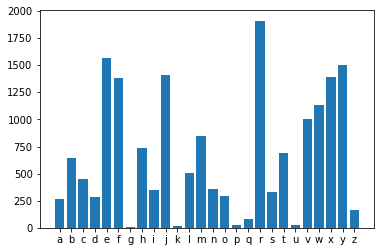

In [49]:
# Plot the distribution

plt.bar(*zip(*data_dict.items()))
plt.show()


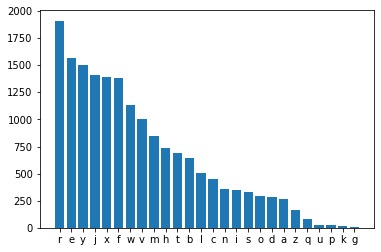

In [50]:
temp=dict(sorted(data_dict.items(), key=lambda x:x[1], reverse=True))
letterFrequencyCipertext = temp.keys()

plt.bar(*zip(*temp.items()))
plt.show()

In [51]:
letterFrequencyAlphabet = 'etaoinsrhdlucmfywgpbvkxqjz'
print("Alphabet", letterFrequencyAlphabet)
print("Cipher  ", ''.join(letterFrequencyCipertext))

Alphabet etaoinsrhdlucmfywgpbvkxqjz
Cipher   reyjxfwvmhtblcnisodazqupkg


In [52]:
mapping_rule2 = dict(zip(letterFrequencyCipertext,letterFrequencyAlphabet))
print(mapping_rule2)


{'r': 'e', 'e': 't', 'y': 'a', 'j': 'o', 'x': 'i', 'f': 'n', 'w': 's', 'v': 'r', 'm': 'h', 'h': 'd', 't': 'l', 'b': 'u', 'l': 'c', 'c': 'm', 'n': 'f', 'i': 'y', 's': 'w', 'o': 'g', 'd': 'p', 'a': 'b', 'z': 'v', 'q': 'k', 'u': 'x', 'p': 'q', 'k': 'j', 'g': 'z'}


In [53]:
# Perform the Frequency Analysis attack

text = substitution_decoding(txt_simple, rule=mapping_rule2)
print(text[:700])

ldamue edpnnu shattnt (afrid 30, 1916 – yebrmarg 24, 2001) pas at acerilat caohecaoiliat, edelorilad etwiteer, atu lrgfonwrafher ktnpt as "ohe yaoher ny itynrcaoint ohenrg". shattnt is tnoeu ynr havitw ynmtueu itynrcaoint ohenrg pioh a datucark fafer, "a caohecaoilad ohenrg ny lnccmtilaoint", philh he fmbdisheu it 1948.
he is adsn pedd ktnpt ynr ynmtuitw uiwioad lirlmio uesiwt ohenrg it 1937, phet—as a 21-gear-ndu casoer's uewree somueto ao ohe cassalhmseoos itsoiomoe ny oelhtndnwg (cio)—he prnoe his ohesis uecntsoraoitw ohao edelorilad affdilaoints ny bnndeat adwebra lnmdu lntsormlo atg dnwilad tmcerilad redaointshif. shattnt lntoribmoeu on ohe yiedu ny lrgfoatadgsis ynr taointad ueyetse um


We assume that the months are april and february, and that "pas" is was. 
That leaves us with e,a,i,r and b already correctly matched to the cipher, and lets us match some of the others.
So can we continue as we discover more likely words. To make it easy for myself, I wrote it all in one cell.

In [54]:
mapping_rule2['d'],mapping_rule2['n'],mapping_rule2['i'] = 'w', 'p', 'f'
mapping_rule2['h'],mapping_rule2['l'] = 'l', 'm'
mapping_rule2['o'] = 'y'
mapping_rule2['c'],mapping_rule2['b'] = 'u', 'd'
mapping_rule2['s'] = "g"
mapping_rule2['e'] = 'n' 
mapping_rule2['f']='o'
mapping_rule2['j']='t'
mapping_rule2['t']='c'
mapping_rule2['m']='h'
mapping_rule2['a']='b'
mapping_rule2['u']='j'
mapping_rule2['k']='x'


text = substitution_decoding(txt_simple, rule=mapping_rule2)
print(text[:700])

claude elwood shannon (april 30, 1916 – february 24, 2001) was an american mathematician, electrical engineer, and cryptographer known as "the father of information theory". shannon is noted for having founded information theory with a landmark paper, "a mathematical theory of communication", which he published in 1948.
he is also well known for founding digital circuit design theory in 1937, when—as a 21-year-old master's degree student at the massachusetts institute of technology (mit)—he wrote his thesis demonstrating that electrical applications of boolean algebra could construct any logical numerical relationship. shannon contributed to the field of cryptanalysis for national defense du


In [55]:
# Print decrypted plaintext and the key (shift)

plaintext = substitution_decoding(ciphertext, rule=mapping_rule2)
print("This is the key", mapping_rule2)
print(text[:1900])


This is the key {'r': 'e', 'e': 'n', 'y': 'a', 'j': 't', 'x': 'i', 'f': 'o', 'w': 's', 'v': 'r', 'm': 'h', 'h': 'l', 't': 'c', 'b': 'd', 'l': 'm', 'c': 'u', 'n': 'p', 'i': 'f', 's': 'g', 'o': 'y', 'd': 'w', 'a': 'b', 'z': 'v', 'q': 'k', 'u': 'j', 'p': 'q', 'k': 'x', 'g': 'z'}
claude elwood shannon (april 30, 1916 – february 24, 2001) was an american mathematician, electrical engineer, and cryptographer known as "the father of information theory". shannon is noted for having founded information theory with a landmark paper, "a mathematical theory of communication", which he published in 1948.
he is also well known for founding digital circuit design theory in 1937, when—as a 21-year-old master's degree student at the massachusetts institute of technology (mit)—he wrote his thesis demonstrating that electrical applications of boolean algebra could construct any logical numerical relationship. shannon contributed to the field of cryptanalysis for national defense during world war ii, incl

## Bonus Task

In [56]:
# Code here
